In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import ipywidgets as widgets
from IPython.display import display
import mpl_interactions.ipyplot as iplt

    Year  Total
0   1960   88.1
1   1965  104.4
2   1970  121.1
3   1975  127.8
4   1980  151.6
5   1985  166.3
6   1990  208.3
7   1995  217.3
8   2000  243.5
9   2005  253.7
10  2010  251.1
11  2015  262.1
12  2016  268.1
13  2017  268.7
14  2018  292.4
15  2019  353.0
16  2020  400.0
17  2021  402.0
18  2022  410.0


/var/folders/jh/d3xlhzqd5cb_vrt1mb900fxc0000gn/T/ipykernel_1782/3313691324.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks)


AttributeError: module 'mpl_interactions.ipyplot' has no attribute 'tooltip'

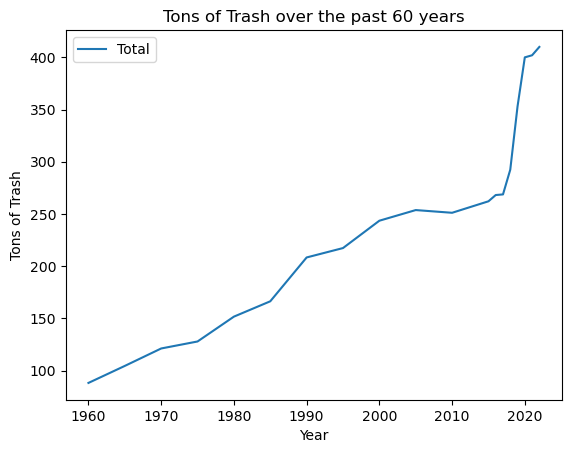

In [2]:
df = pd.read_csv('/Users/prashantkondayapalepu/Downloads/Trash Rates - Sheet1.csv')
print(df)
df.round({'Year':0})
ax = df.plot( x='Year',title = 'Tons of Trash over the past 60 years')
ax.set_ylabel("Tons of Trash")
x_ticks = [int(round(x)) for x in ax.get_xticks()]
ax.set_xticklabels(x_ticks) 
tooltip = iplt.tooltip(points=df['y'], labels=df.index)
zoom = iplt.zoom_factory(ax)
pan = iplt.pan_factory(ax)

ADF Statistic: -0.44338341577180557
p-value: 0.9025994373294498
Critical Values:
    1%, -4.137829282407408
Critical Values:
    5%, -3.1549724074074077
Critical Values:
    10%, -2.7144769444444443


<AxesSubplot:title={'center':'2nd differenciation of depression rates'}>

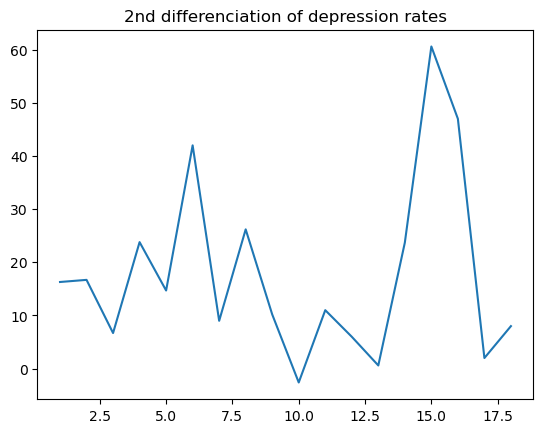

In [14]:
result = adfuller(df['Total'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print('Critical Values:')
    print(f'    {key}, {value}')
if result[1]> 0.05:
    df['Total_diff'] = df['Total'].diff()
df['Total_diff'].plot(title = "2nd differenciation of depression rates")


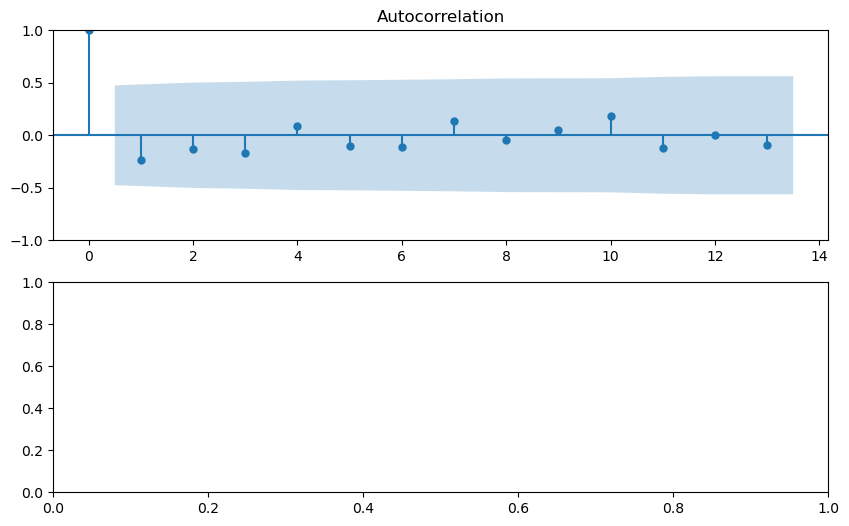

In [5]:
fig, ax = plt.subplots(2,1,figsize=(10,6))
plot_acf(df['Total_diff'].dropna(), ax=ax[0])
plt.show()

In [15]:
model = ARIMA(df['Total_diff'].dropna(), order=(1,1,1))
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:             Total_diff   No. Observations:                   18
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -72.989
Date:                Sat, 08 Apr 2023   AIC                            151.977
Time:                        14:15:33   BIC                            154.477
Sample:                             0   HQIC                           152.225
                                 - 18                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2997      0.484      0.619      0.536      -0.649       1.248
ma.L1         -0.9994     74.373     -0.013      0.989    -146.767     144.769
sigma2       274.0138   2.04e+04      0.013      0.9

/Users/prashantkondayapalepu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/prashantkondayapalepu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/prashantkondayapalepu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/prashantkondayapalepu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/prashantkondaya

In [16]:
forecast = results.forecast(steps=10)
print(forecast)

18    14.738675
19    16.758344
20    17.363665
21    17.545087
22    17.599462
23    17.615759
24    17.620643
25    17.622107
26    17.622546
27    17.622677
Name: predicted_mean, dtype: float64


/Users/prashantkondayapalepu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
